Q1

1.
simple linear regression only contains one outcome variable based on the predicted variable, multiple linear regression contains multiple outcome variables. Multiple linear regression can better estimate the difference between different level of outcome, can estimate factors.
2.
continuous variable in linear regression is that the outcome variable is numerical and continuous, so that we can directly produce the scatter plot and the regression.
Y=β0+β1*X+ϵ beta1 is the slope
indicator variable in linear regression is that the outcome variable is categorical and binary, so that we use one indicator to make the variable into two different results, and then make the regression.
   $$\large Y_i = \beta_{\textrm{A}} + 1_{[x_i=\textrm{"B"}]}(x_i)\beta_{\textrm{B-offset}} + 1_{[x_i=\textrm{"C"}]}(x_i)\beta_{\textrm{C-offset}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma^2\right)$$, X1 is one variable and X2 is other variable
3.
for the simple linear regression, for continuous variable only compute the whole variance.
for the multiple linear regression, there are two different variables linear model, which can use to estimate the difference between two variables' mean.
Y=β0+β1*X1+β2*X2+ϵ
4.
after the interaction added, the slope and y-intercept changes in two linear regression, and may causes the change of the predictor or the outcome variance.
$$\large Y_i = \beta_0 + \beta_z z_i + \beta_{\textrm{B-offset}} 1_{[x_i=\textrm{"B"}]}(x_i) + \beta_{\textrm{z-change-in-B}} z_i \times 1_{[x_i=\textrm{"B"}]}(x_i) + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma^2\right)$$<br>
5.
this makes the non-binary variables into binary variable, calculate the difference between the interaction and the outcomes. This will not change the slope and y-intercept.
Y=β0+β1*D1+β2*D2+ϵ

Q2

outcome:
effectiveness of the TV ad
predictor:
amount spent on online advertising and vice versa

if there is some effect that ads on TV and ads online interact each others, the might need to be taken into the outcome
without interactions: Y = βA+1[xi="TV"]βTV+1[xi="Online"]βOnline+𝜖
For this formula, we estimate two variables seperately, and consider there is no effect between TV and online ads.
with interaction: Y=β0+β1⋅TV+β2⋅Online+β3⋅(TV×Online)
For this formula, we consider that there is an effect between TV and online ads.So in this time, we calculate the effectiveness togerther.

General Differences in Predictions:
Without Interaction: 
The predicted sales change linearly with each budget;
Model With Interaction: 
Predictions change in a more complex way because the effect of one budget depends on the level of the other budget.

If the ad budgests are categorized as "high" or "low", we convert the continuous predictor variables into binary variables, thus in this senario, we can guarrantee the effect on each others decrease.
With these models, inputting binary values (1 for “high” or 0 for “low”) allows predictions to reflect the different levels of each budget, and the interaction term will adjust predictions when both budgets are high, allowing the model to account for any potential synergies between high ad spending in both mediums.

Q3

In [2]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(url).fillna('None')

# Example of creating a new variable (for illustration purposes)
# You can adjust this as needed based on your dataset
data['female'] = (data['gender'] == 'Female').astype(int)

linear_model_specification_formula = \
'female ~ CONNECTION_social_days_friends_p7d_grouped*relationship_status + C(relationship_status)'

# Fit the logistic regression model
log_reg_fit = smf.logit(linear_model_specification_formula, data=data).fit()

# Show the summary of the model
log_reg_fit.summary()


/tmp/ipykernel_52/2161104824.py:6: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url).fillna('None')


KeyError: 'gender'

Q4

The low R-squared value means that the model doesn't explain much of the overall variability in the outcome, but statistically significant coefficients with large values suggest that the predictors have meaningful relationships with the dependent variable. The model is good at identifying the effect of individual predictors, but it might miss out on capturing all the complexity of the data.

Q5

1.
This code illustrates how to:
Split a dataset into training and testing subsets.
Handle missing data.
Set a random seed for reproducibility.
Ensure the model has data for both training and testing, which is a key step in building and evaluating machine learning models.
2.
This code fits a linear regression model with Attack and Defense as predictors of HP. The summary output will provide insight into how well the model fits the data and the statistical significance of the predictors. If the coefficients are significant (with low p-values), and the R-squared value is reasonably high, it suggests that Attack and Defense are useful predictors of HP.
3.
this model create the predictors and corresponding y outcome; and find the r-squares in sample and out of sample
4.
This code builds a more complex model with multiple predictors and interaction terms, allowing for a more nuanced relationship between the predictors and the dependent variable HP. The resulting summary provides a detailed breakdown of how well the model fits the data and which variables are statistically significant in predicting HP.
5.
demonstrates how to evaluate the performance of a regression model using both in-sample and out-of-sample R-squared values, which measure the model's ability to explain variance in the dependent variable

Q6

model4_linear_form create multiple linear regression model with interaction terms between several predictor variables. model4_spec.exog is the matrix represents the predictor variables (independent variables) as columns, with each row corresponding to an observation.
Multicollinearity occurs when predictor variables are highly correlated with each other. This happens when one predictor is linearly dependent on or highly correlated with others.
Multicollinearity contributes to poor out-of-sample generalization in Overfitting, Unstable Coefficients, Reduced Interpretability, and Overfitting in Interaction Terms.

### Summary of Our Chat:

2. **Model Building**:
   We explored various **regression models** using **statsmodels** and **sklearn** for predicting outcomes related to social activities based on predictors like gender and relationship status. These models included OLS (ordinary least squares) regression and more complex specifications incorporating interactions between predictors.

3. **Challenges with Multicollinearity**:
   A significant challenge in your models came from the issue of **multicollinearity**—particularly when adding multiple interaction terms, which caused instability in the model and led to very high **condition numbers** (e.g., `2,250,000,000,000,000`). This high condition number indicates that the predictors in the model were highly correlated, causing issues with model interpretability and making it difficult for the model to generalize well to new data (out-of-sample performance).

4. **Scaling and Centering**:
   We discussed how **scaling and centering** predictor variables helps standardize them to the same scale, which should ideally improve model stability. However, interactions between scaled variables still caused multicollinearity, as highly correlated predictors made it difficult for the model to separate their individual effects.

5. **Proposed Solutions**:
   To improve model performance and stability, we suggested:
   - **Reducing model complexity** by removing unnecessary interactions.
   - **Checking correlations** between predictors and removing highly correlated ones.
   - Using **regularization techniques** (like Ridge or Lasso regression) to handle multicollinearity and improve generalization.

In conclusion, the discussion centered around fitting multiple regression models to your dataset, understanding multicollinearity's impact on model performance, and identifying ways to improve model stability and generalization.
https://chatgpt.com/share/6736b4c7-822c-8006-9ce7-9ecf695987a4

Q7

From model3_fit to model5_linear_form, the model is expanded to capture interaction terms and higher-order relationships between predictors.
Interaction Terms: In model5_linear_form, the interactions between Attack, Defense, and Speed (and possibly other variables) are added to reflect the idea that the combined effect of two predictors on the outcome might differ from the sum of their individual effects
The development from model5_linear_form to model6_linear_form likely involves the inclusion of additional variables or more complex interactions between existing variables.Like produce a non-linear regression
From model6_linear_form to model7_linear_form, the model is extended based on theoretical considerations, including adding more variables, refining interaction form, making more complex relationship.


Q8

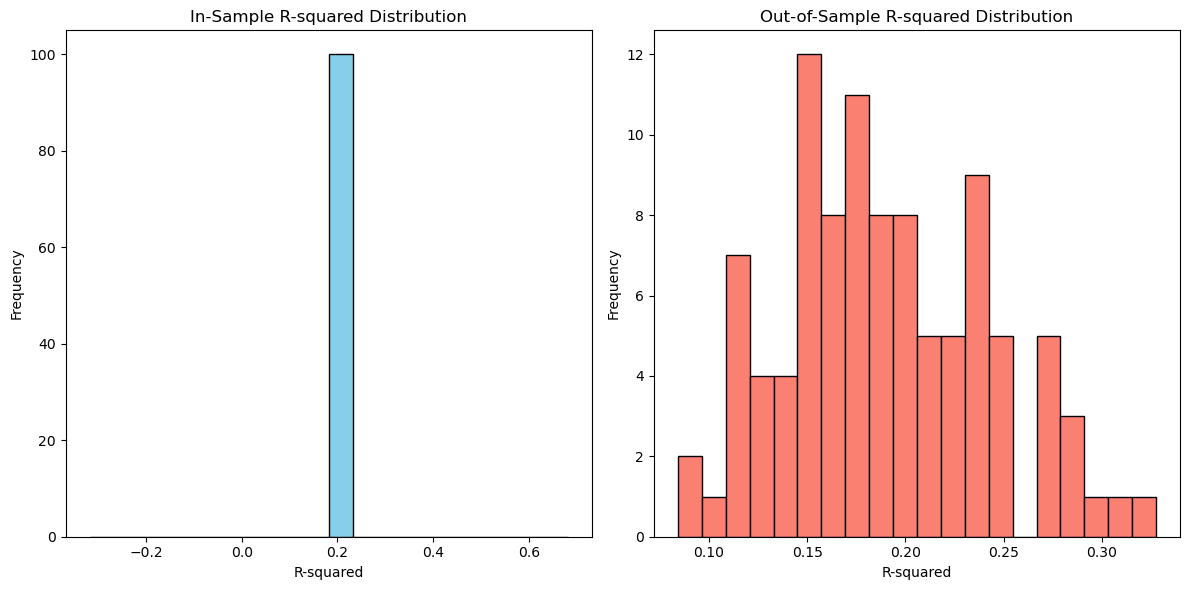

Mean In-Sample R-squared: 0.18206473213033925
Mean Out-of-Sample R-squared: 0.1901242581189187


In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset (update the URL if needed)
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

# Example of creating a new variable (for illustration purposes)
pokeaman['female'] = (pokeaman['Type 1'] == 'Fire').astype(int)  # Example for binary classification

# Define model specification
model_spec = smf.ols(formula='HP ~ Attack + Defense', data=pokeaman)

# Initialize lists to store metrics
in_sample_r_squared = []
out_of_sample_r_squared = []

# Number of iterations for random splits
n_iterations = 100

for _ in range(n_iterations):
    # Perform train-test split
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)  # 50% train, 50% test
    
    # Fit the model on the training set
    model_fit = model_spec.fit()
    
    # In-sample R-squared (on training data)
    in_sample_r_squared.append(model_fit.rsquared)
    
    # Out-of-sample R-squared (on test data)
    yhat_test = model_fit.predict(pokeaman_test)
    y_test = pokeaman_test['HP']
    out_of_sample_r_squared.append(np.corrcoef(y_test, yhat_test)[0, 1] ** 2)

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot the distribution of in-sample and out-of-sample R-squared
plt.subplot(1, 2, 1)
plt.hist(in_sample_r_squared, bins=20, color='skyblue', edgecolor='black')
plt.title('In-Sample R-squared Distribution')
plt.xlabel('R-squared')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(out_of_sample_r_squared, bins=20, color='salmon', edgecolor='black')
plt.title('Out-of-Sample R-squared Distribution')
plt.xlabel('R-squared')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Output the mean of both
print(f'Mean In-Sample R-squared: {np.mean(in_sample_r_squared)}')
print(f'Mean Out-of-Sample R-squared: {np.mean(out_of_sample_r_squared)}')


Mean In-Sample R-squared: 0.18206473213033925 indicates that the model is able to explain only a small proportion (18.2%) of the variance in the training data.
The primary purpose of this demonstration is to evaluate and compare the performance of a regression model on both training data (in-sample) and testing data (out-of-sample) in order to gain insights into the model's ability to generalize and to assess how well it captures the underlying structure of the data.

Q9

These codes illustrate the process of evaluating and testing regression models for their ability to generalize across different subsets of the data. By focusing on Pokémon generations, the analysis checks whether models trained on one group of datacan predict outcomes  for unseen data. The in-sample R-squared values show how well the model fits the training data, while the out-of-sample R-squared values assess the model’s generalizability. The results help understand whether the model is overfitting to specific generations or whether it can predict across different datasets effectively.